# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# K Nearest Neighbor Classification using Euclidean Distance

### Code to calculate Euclidean Distance between two points

In [2]:
def Euclidean_dist(pt1,pt2):
    distance=0.0
    for i in range(len(pt1)):
        distance += (pt1[i]-pt2[i])**2
    return math.sqrt(distance)

### Code to get 'n' Nearest Neighbors

In [3]:
def Nearest_neighbors(train,test_obs,n):
    neighbor_distance= []
    for i in range(len(train)):
        l1=list(train.iloc[i,:])+[Euclidean_dist(train.iloc[i,:-1],test_obs)]
        neighbor_distance= neighbor_distance+[l1]
    neighbor_distance.sort(key=lambda x: x[-1])
    nearest_neighbors= [neighbor_distance[i] for i in range(0,n)]
    y_pred= [i[-2] for i in nearest_neighbors]
    return(int(max(y_pred,key=y_pred.count)))

### Code to return the prediction (0 or 1) for a test observation

In [4]:
def Prediction(train,test_obs,n):
    
    NN=Nearest_neighbors(train,test_obs,3)
    M= [i[n-1] for i in NN]
    
    return(test_obs+[max(M)])

### Normalizing the predictors

In [5]:
def Normalize(data):
    df1=[]
    for i in range(len(data.columns)):
        z=[]
        z= [(k-np.mean(df.iloc[:,i]))/np.std(df.iloc[:,i]) for k in df.iloc[:,i]]
        df1.append(z)
    df1=pd.DataFrame(df1)
    df1=df1.T
    df1.columns=data.columns
    return(df1)

### F-Score

In [6]:
def F_score(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    
    return((2*ConfusionMatrix[1,1])/(2*ConfusionMatrix[1,1]+ConfusionMatrix[1,0]+ConfusionMatrix[0,1]))

### Code to calculate the accuracy of the Model

In [7]:
def Accuracy(Act,Pred):
    ConfusionMatrix= confusion_matrix(Act,Pred)
    #return(ConfusionMatrix)
    return((ConfusionMatrix[0,0]+ConfusionMatrix[1,1])/(len(Act)))

# Importing the data.

### Data can be downloaded from <a href="https://www.kaggle.com/uciml/pima-indians-diabetes-database" target="_blank">here</a>.

In [8]:
df= pd.read_csv('datasets_228_482_diabetes.csv')

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Exploration

#### Ideally Glucose, Blood Pressure, Skin Thickness, Insulin levels and BMI should be greater than 0. These values being 0 indicate bad data. 

#### Imputing 0 values with means

In [10]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [11]:
df.fillna(df.mean(),inplace=True)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc48d2f6978>,
      dtype=object)

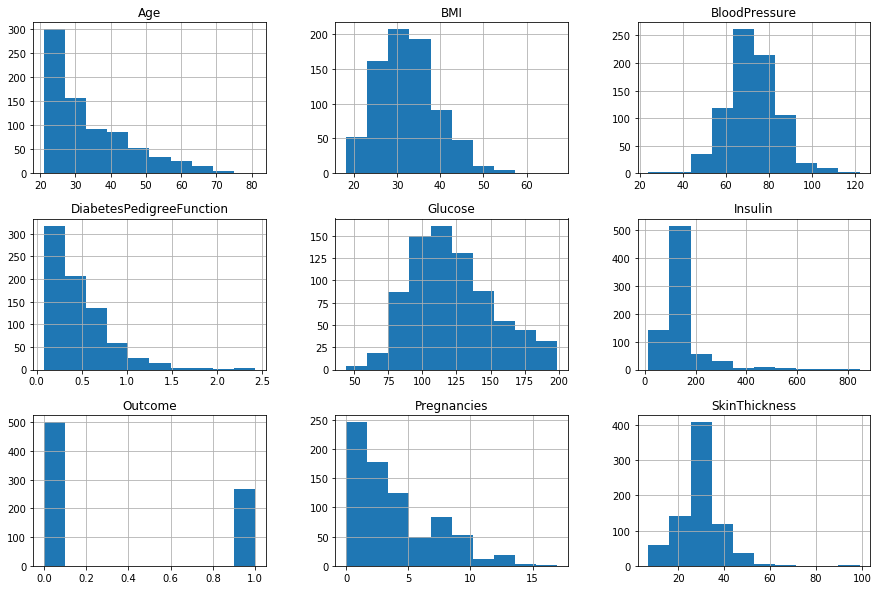

In [13]:
#Distribution plots of predictors

df.hist(bins=10,figsize=(15,10))

#### Looking at the Correlation matrix, we can hypothesize that Glucose levels, BMI and Age are vital in determining whether or not a patient has diabetes 

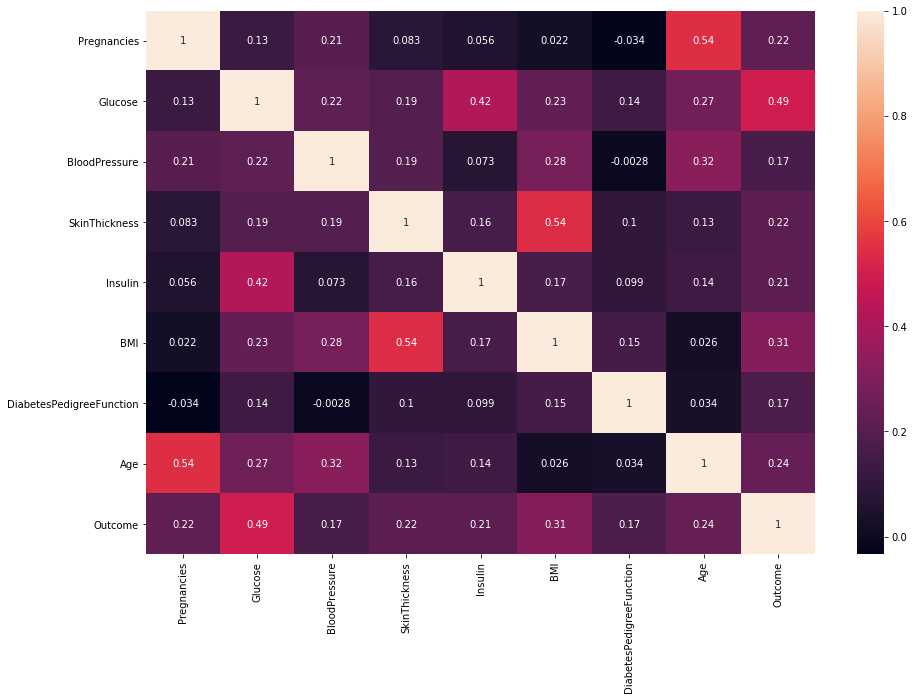

In [14]:
plt.figure(figsize=(15,10))
p=sns.heatmap(df.corr(),annot=True)

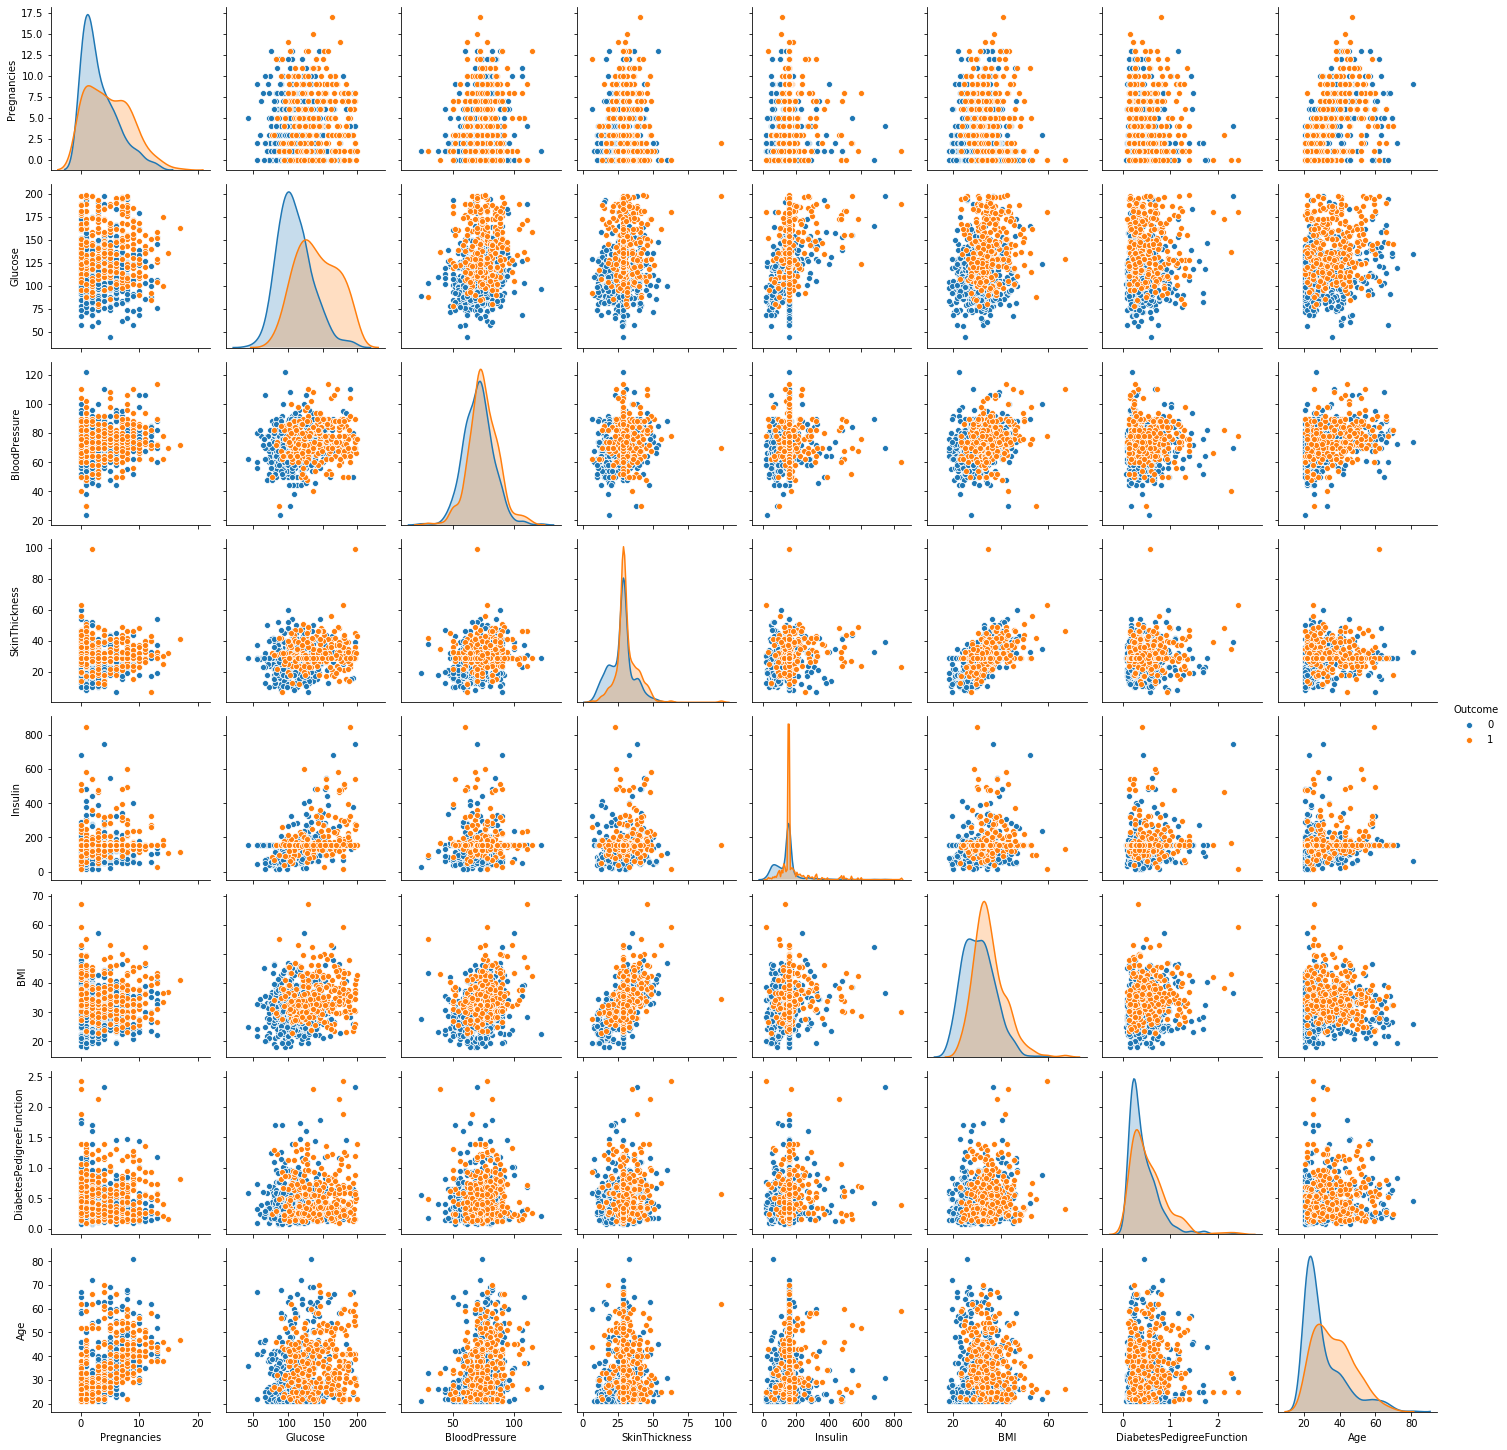

In [15]:
sns.pairplot(data=df,hue='Outcome')

In [16]:
X=df.drop(columns='Outcome')
Y=df['Outcome']

In [17]:
X= Normalize(X)

In [18]:
#A sneakpeak of Normalized data
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-7.024666e-15,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-7.024666e-15,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,5.661555e-15,-7.024666e-15,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


### Split the available data into 70% Train and 30% Test data

In [19]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=5)

In [20]:
X_train=X_train.join(Y_train)

In [21]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape,sep='\n')

(537, 9)
(537,)
(231, 8)
(231,)


### Finding the best possible value for 'k' i.e. optimal value for number for neighbors

* The model is developed on train dataset and the accuracy is calculated on the test data. 
* The value of k that gives maximum accuracy is considered the best

In [22]:
Acc=[]
for j in range(1,20):
    pred=[]
    for i in range(len(X_test)):
        pred.append([Nearest_neighbors(X_train,X_test.iloc[i,:],j)])
    Acc= Acc+([Accuracy(Y_test,pred)])

### The accuracy is maximum at k=17. 

In [23]:
Acc

[0.6666666666666666,
 0.6666666666666666,
 0.7402597402597403,
 0.7359307359307359,
 0.7359307359307359,
 0.7532467532467533,
 0.7229437229437229,
 0.7489177489177489,
 0.7272727272727273,
 0.7445887445887446,
 0.7445887445887446,
 0.7359307359307359,
 0.7445887445887446,
 0.7445887445887446,
 0.7402597402597403,
 0.7489177489177489,
 0.7575757575757576,
 0.7489177489177489,
 0.7489177489177489]

In [24]:
pred=[]
for i in range(len(X_test)):
    pred.append(Nearest_neighbors(X_train,X_test.iloc[i,:],Acc.index(max(Acc))+1))
    
X_test['Pred']= pred
X_test['Outcome']= Y_test

/Users/spoorthimedasani/miniconda3/envs/AV/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/spoorthimedasani/miniconda3/envs/AV/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


### The model has an accuracy of 76%

In [25]:
from sklearn.metrics import classification_report

print(classification_report(X_test['Outcome'], X_test['Pred']))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82       160
           1       0.59      0.70      0.64        71

    accuracy                           0.76       231
   macro avg       0.72      0.74      0.73       231
weighted avg       0.77      0.76      0.76       231



### Summary from Confusion Matrix:
* True Negatives: 125
* False Positives: 35
* False Negatives: 21
* True Positives: 50

In [26]:
pd.crosstab(X_test['Outcome'], X_test['Pred'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,125,35,160
1,21,50,71
All,146,85,231
